In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

df = pd.read_csv(next(iter(uploaded)))

Saving penguins_size (1).csv to penguins_size (1).csv
User uploaded file "penguins_size (1).csv" with length 13519 bytes


In [ ]:
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Univariate Analysis

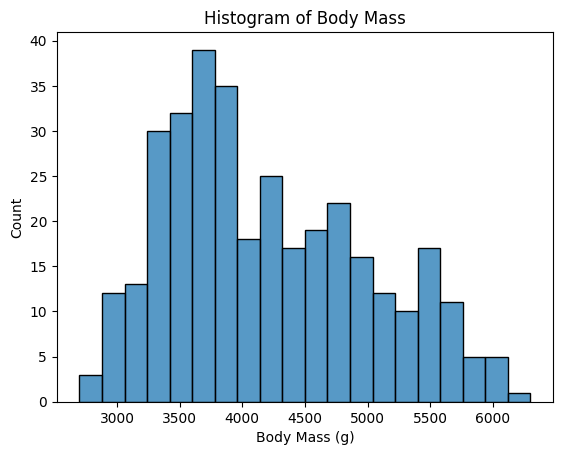

In [ ]:
# Histogram of body mass
import seaborn as sns

sns.histplot(data=df, x='body_mass_g', bins=20)
plt.title('Histogram of Body Mass')
plt.xlabel('Body Mass (g)')
plt.show()

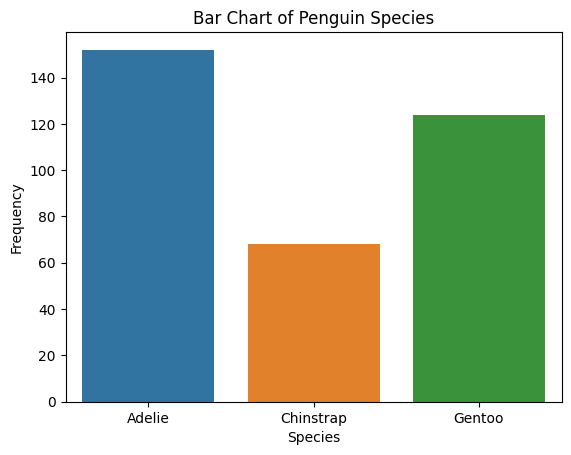

In [ ]:
# Bar chart of penguin species
sns.countplot(data=df, x='species')
plt.title('Bar Chart of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

Bi-Variate Analysis

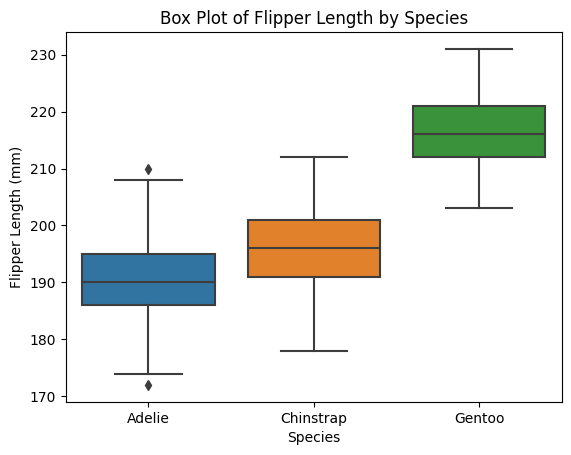

In [ ]:
# Box plot of flipper length by species
sns.boxplot(data=df, x='species', y='flipper_length_mm')
plt.title('Box Plot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

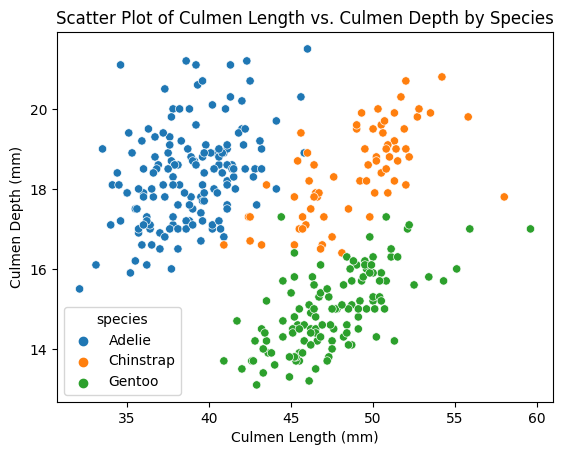

In [ ]:
# Scatter plot of culmen length vs. culmen depth by species
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Scatter Plot of Culmen Length vs. Culmen Depth by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

Multi-Variate Analysis

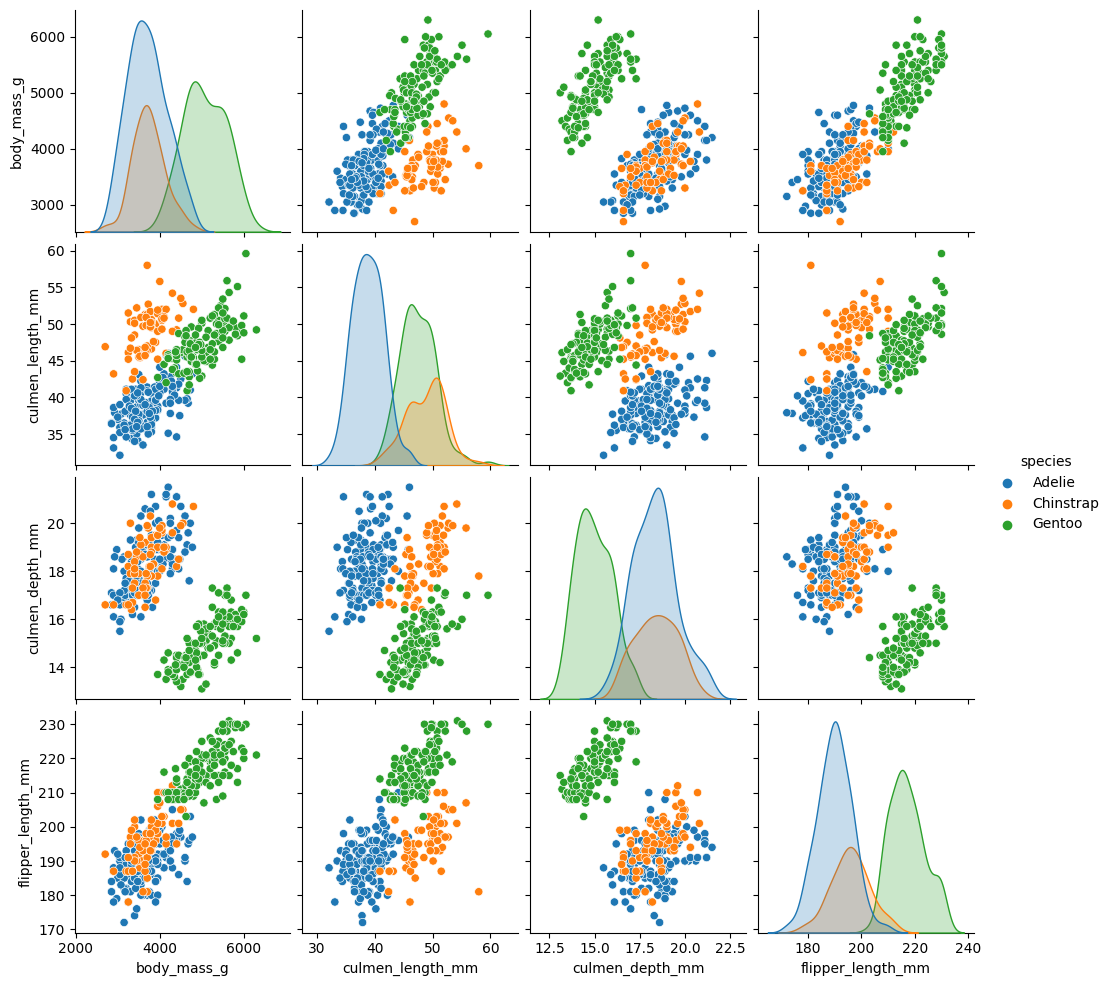

In [ ]:
# Pair plot of body mass, culmen length, culmen depth, and flipper length by species
sns.pairplot(data=df, hue='species', vars=['body_mass_g', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
plt.show()

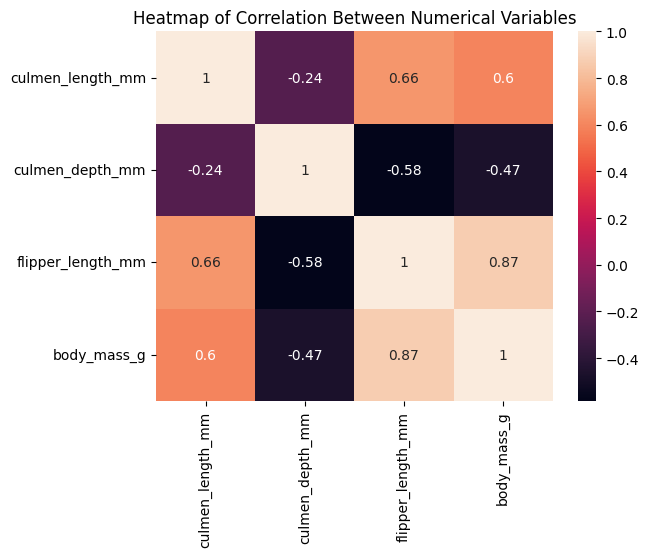

In [ ]:
# Heatmap of correlation between numerical variables
corr = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation Between Numerical Variables')
plt.show()

## Perform descriptive statistics on the dataset.**bold text**

In [ ]:
# Calculate descriptive statistics
print('Descriptive Statistics for Body Mass (in grams):')
print(df['body_mass_g'].describe())


Descriptive Statistics for Body Mass (in grams):
count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64


In [ ]:
print('\nDescriptive Statistics for Culmen Length (in mm):')
print(df['culmen_length_mm'].describe())



Descriptive Statistics for Culmen Length (in mm):
count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64


In [ ]:
print('\nDescriptive Statistics for Culmen Depth (in mm):')
print(df['culmen_depth_mm'].describe())


Descriptive Statistics for Culmen Depth (in mm):
count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: culmen_depth_mm, dtype: float64


In [ ]:
print('\nDescriptive Statistics for Flipper Length (in mm):')
print(df['flipper_length_mm'].describe())


Descriptive Statistics for Flipper Length (in mm):
count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


## Check for Missing values and deal with them.**bold text**

In [ ]:
# Check for missing values
print('Number of Missing Values in Each Column:')
print(df.isnull().sum())

Number of Missing Values in Each Column:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
cluster              0
species_encoded      0
dtype: int64


In [ ]:
# Deal with missing values
df.dropna(inplace=True)

In [ ]:
# Confirm there are no missing values
print('\nNumber of Missing Values in Each Column After Dealing with Them:')
print(df.isnull().sum())


Number of Missing Values in Each Column After Dealing with Them:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
cluster              0
species_encoded      0
dtype: int64


## Find the outliers and replace them **outliers**

In [ ]:
import numpy as np
from scipy.stats import zscore

# Compute the z-scores for each numerical column in the dataframe
z_scores = df.select_dtypes(include=np.number).apply(zscore)

# Find rows with z-score greater than a threshold (e.g., 3)
threshold = 3
outlier_rows = np.abs(z_scores) > threshold

# Replace outliers with the median value of each column
numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    median_value = df[column].median()
    df.loc[outlier_rows[column], column] = median_value


In [ ]:
# Calculate the count of outliers remaining in each column
outlier_counts = outlier_rows.sum()

# Print the number of outliers remaining in each column
print("Number of outliers remaining in each column:")
print(outlier_counts)

Number of outliers remaining in each column:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64


## Check for Categorical columns and perform encoding.**bold text**

In [ ]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print('Categorical Columns:', categorical_cols)

Categorical Columns: Index(['species', 'island', 'sex'], dtype='object')


In [ ]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# View the encoded dataset
print(df_encoded.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  cluster  \
0              39.1             18.7              181.0       3750.0        1   
1              39.5             17.4              186.0       3800.0        1   
2              40.3             18.0              195.0       3250.0        1   
4              36.7             19.3              193.0       3450.0        1   
5              39.3             20.6              190.0       3650.0        1   

   species_encoded  species_Adelie  species_Chinstrap  species_Gentoo  \
0                0               1                  0               0   
1                0               1                  0               0   
2                0               1                  0               0   
4                0               1                  0               0   
5                0               1                  0               0   

   island_Biscoe  island_Dream  island_Torgersen  sex_.  sex_FEMALE  sex_M

## Scaling the **data**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Separate the numerical columns
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_numerical = df[numerical_cols]

In [ ]:
# Perform scaling on the numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)


In [ ]:
# Replace the original numerical columns with the scaled values
df[numerical_cols] = df_scaled

# View the scaled dataset
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen         -0.897653         0.783487          -1.429521   
1  Adelie  Torgersen         -0.824290         0.121896          -1.072408   
2  Adelie  Torgersen         -0.677564         0.427246          -0.429605   
4  Adelie  Torgersen         -0.860972         1.750427          -0.786718   
5  Adelie  Torgersen         -0.934335         0.325462          -1.429521   

   body_mass_g     sex  cluster  species_encoded  
0    -0.571229    MALE        1                0  
1    -0.509011  FEMALE        1                0  
2    -1.193405  FEMALE        1                0  
4    -0.695664  FEMALE        1                0  
5    -0.726773    MALE        1                0  


## Perform any of the clustering **algorithms**

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42)


In [ ]:
# Initialize K-means clustering with n_init set explicitly
kmeans = KMeans(n_clusters=3, n_init=10)


In [ ]:
df_numeric = df.drop('species', axis=1)
df_encoded = pd.get_dummies(df)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])


In [ ]:
df_encoded.dropna(inplace=True)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_encoded = imputer.fit_transform(df_encoded)


In [ ]:
# Retrieve the cluster labels
labels = kmeans.labels_

# Access the cluster centers
centers = kmeans.cluster_centers_

In [ ]:
# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Print the cluster assignments
print(cluster_labels)

[0 0 2 6 0 0 9 2 0 3 0 6 3 6 3 6 0 0 7 0 0 6 2 2 7 2 7 6 7 6 7 7 6 6 9 2 7
 2 3 2 9 6 6 7 6 3 6 7 2 0 6 0 2 0 2 3 0 7 2 7 6 7 2 3 0 7 6 7 0 3 0 7 6 7
 2 9 0 3 6 6 0 6 7 0 6 3 6 3 6 3 0 3 2 7 0 9 2 3 2 6 0 7 2 9 0 9 2 3 7 7 2
 0 6 6 2 6 6 7 2 7 6 3 2 7 6 6 6 3 6 7 2 7 6 3 6 6 2 0 2 0 3 6 6 0 0 7 6 7
 0 6 0 7 2 0 7 0 0 0 0 7 6 7 6 0 6 3 0 6 2 0 6 7 6 0 0 9 2 3 6 7 0 7 0 5 2
 3 7 0 6 6 0 3 6 3 2 0 6 7 0 7 6 6 2 7 0 6 7 0 0 7 6 0 7 0 3 4 3 4 1 9 5 1
 3 1 9 4 9 8 3 8 7 8 5 1 4 5 3 5 5 1 4 9 4 1 9 5 8 1 1 5 1 3 1 7 4 3 9 4 5
 3 1 1 1 5 1 3 5 5 5 3 5 3 4 3 1 3 4 9 4 8 9 4 9 5 1 1 9 8 9 8 9 8 9 4 9 1
 9 4 9 1 5 4 5 1 9 4 5 1 5 5 9 1 5 4 5 4 4 9 4 9 4 5 8 9 4 3 8 5 8 5 5 4 1
 1]


In [ ]:
# Add a new column to the DataFrame for cluster labels
df_encoded['cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(df_encoded)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     cluster  species_Adelie  species_Chinstrap  species_Gentoo  \
0          0               1                

## Add the cluster data with the primary **dataset**

In [ ]:
# Add the cluster labels to the primary dataset
df['cluster'] = kmeans.labels_

# Print the first few rows of the updated dataset
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen         -0.897653         0.783487          -1.429521   
1  Adelie  Torgersen         -0.824290         0.121896          -1.072408   
2  Adelie  Torgersen         -0.677564         0.427246          -0.429605   
4  Adelie  Torgersen         -0.860972         1.750427          -0.786718   
5  Adelie  Torgersen         -0.934335         0.325462          -1.429521   

   body_mass_g     sex  cluster  species_encoded  
0    -0.571229    MALE        0                0  
1    -0.509011  FEMALE        0                0  
2    -1.193405  FEMALE        2                0  
4    -0.695664  FEMALE        6                0  
5    -0.726773    MALE        0                0  


### Split the data into dependent and independent variables.**bold text**

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Assuming you have a dataset stored in a pandas DataFrame called 'data'
X = df.drop('species', axis=1)  # DataFrame containing the independent variables
y = df['species']  # Series containing the dependent variable

### Split the data into training and **testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(df.columns)


Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'cluster',
       'species_encoded'],
      dtype='object')


In [ ]:
print(encoded_data.columns)


Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_.',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')


In [ ]:
# Drop samples with missing values
df.dropna(inplace=True)

# Preprocess the data by one-hot encoding the categorical variables
encoded_data = pd.get_dummies(df)

# Split the encoded data into independent variables (features) and dependent variable (target)
X = encoded_data.drop(['species_Adelie', 'species_Chinstrap', 'species_Gentoo'], axis=1)
y = encoded_data[['species_Adelie', 'species_Chinstrap', 'species_Gentoo']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0
